# Skillbox - Мастер-класс: Разведочный анализ данных + Подготовка отчетов - Kiva.org
***

#  1. Kiva и ее деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva - это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva - **Make a loan, change a life**

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 
Список заявок, назанчений и стран, нуждающихся в финансировании можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с Сельским хозяйством, Питанием, Здоровьем и гигиеной, Розничной торговлей и поддержкой малого бизнеса.

## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva профинансировала более 1 миллиарда долларов для 2 миллионов заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн. небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, финансируемых через Kiva, составляет $1,11 млрд.
* 97,0% - доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva - женщины
* Кредит Kiva финансируется каждые 2 минуты



## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Постановка задач и формулирование вопросов
***

Kiva хочет сделать так, чтобы собранные деньги тратились с максимальной пользой. В первую очередь, конечно же, их интересует не дисперсия пожертвований и не еще какие-нибудь статистические показатели, а ощутимые выводы и рекомендации, которые позволят им работать эффективнее и больше понимать специфику потребностей и уровень бедности в разных странах и регионах. 

- Проверьте, насколько имеющиеся данные чисты, то есть подвержены выбросам, пропущенным и недействительным значениям
- Ознакомьтесь с датасетом, изучите его базовые характеристики, выявите первоначальные зависимости
- Изучите основные демографические характеристики людей, которые используют Kiva. Из каких они регионов и стран? Какова гендерная характеристика заемщиков?
- Посмотрите, для каких целей людям нужны средства и какие суммы они просят. Изучите сектора экономики, виды деятельности и сделайте выводы о том, как обстоят дела в каждом из них.
- Немаловажным является еще один вопрос: как долго заемщикам приходится ждать полного финансирования заявки? Известно, что некоторые люди на платформе просят ссуды на неотложные нужды.
- Попробуйте изучить природу зависимости времени, требуемого на погашение ссуды и суммы кредита. Возможно, это поможет лучше узнать, сколько люди в конкретных регионах могут себе позволить выплачивать на самые важные нужды.
- Сформулируйте основные выводы и визуальные материалы, подкрепляющие их.


## 1.4. Набор данных от Kiva
***

**kiva_loans** - это набор данных, который содержит большую часть информации о займах:
- id - Уникальный идентификатор для кредита
- funded_amount - Сумма, выплаченная Kiva агенту на местах (USD)
- loan_amount - Сумма, выплаченная полевым агентом заемщику (USD)
- sector - Сектор использования займа
- activity - Более гранулированная категория
- use - Назначение использования суммы кредита
- country_code - ISO код страны страны, в которой был выдан заем
- country - Полное название страны, в которой был выдан кредит
- posted_time - Время, в которое заявка была опубликована на Kiva
- disbursed_time - Время, когда кредитный агент выдал заемщику сумму
- funded_time - Время, когда заявка полностью финансируется кредиторами
- term_in_months - Срок, на который был выдан кредит в месяцах
- lender_count - Общее количество кредиторов, которые внесли свой вклад в этот кредит
- loaner_genders - Разделенные запятыми буквы M, F, где каждый экземпляр представляет одного мужчину / женщину в группе

**kiva_mpi_region_locations** - набор данных, содержащий данные о регинах и показатели MPI:
(Global Multidimensional Poverty Index - глобальный индекс бедности) ряда регионов (субнациональных) в мире.  Чем больше это значение, тем выше бедность в соответствующем регионе 
- country - страна
- region - регион в стране
- world_region - часть света
- MPI - многомерный индекс бедности
- geo - координаты (широта, долгота)



# 2. Разведочный анализ данных
***

## 2.1. Первое знакомство с датасетом
***

Давайте импортируем необходимые библиотеки и загрузим предоставленные наборы данных в память

In [2]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

In [30]:
df_kiva_loans = pd.read_csv("../kiva/kiva_loans.csv.xz")
df_mpi = pd.read_csv("../kiva/kiva_mpi_region_locations.csv.xz")

Для начала наша задача состоит в том, чтобы взглянуть на небольшой кусочек предоставленных данных

In [5]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


Давайте посмотрим на наличие пропущенных значений, чтобы не столкнуться с неприятными сюрпризами при дальнейшей работе

<AxesSubplot:>

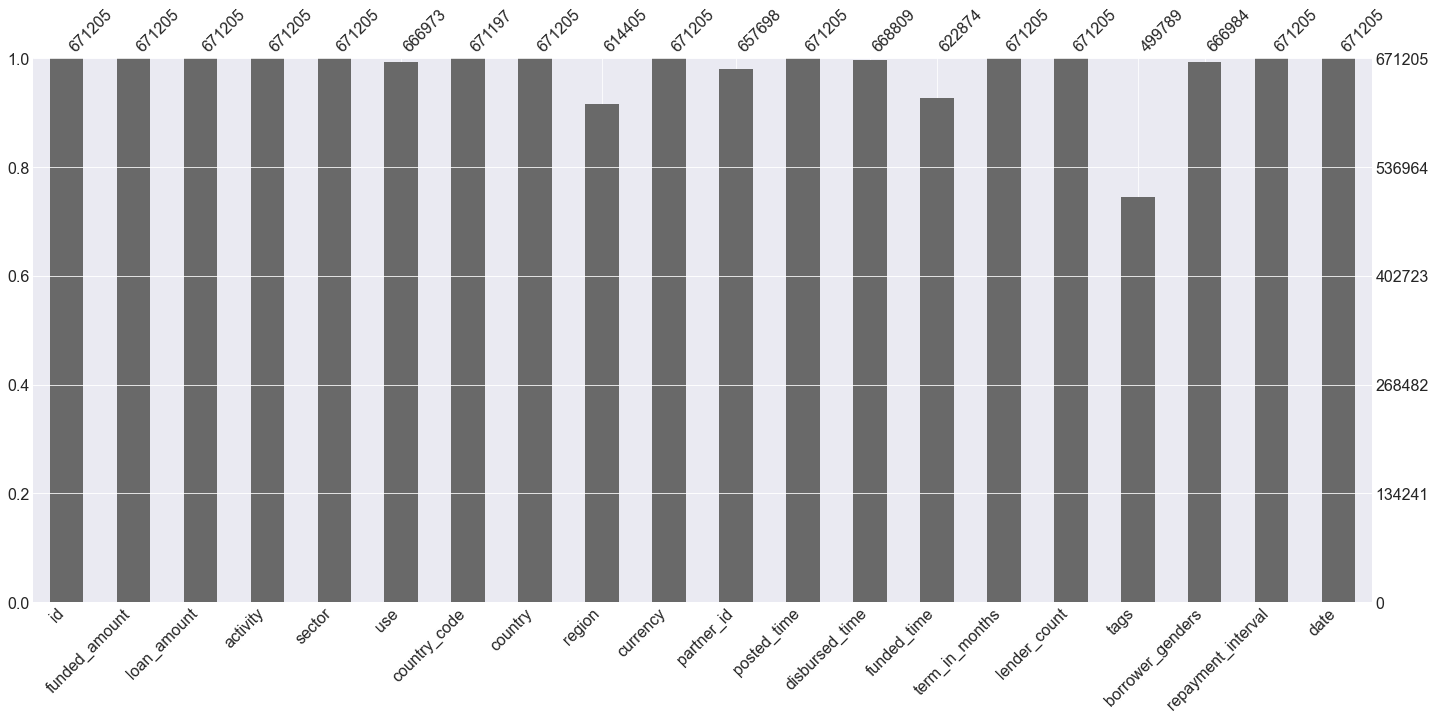

In [6]:
msno.bar(df_kiva_loans)

<AxesSubplot:>

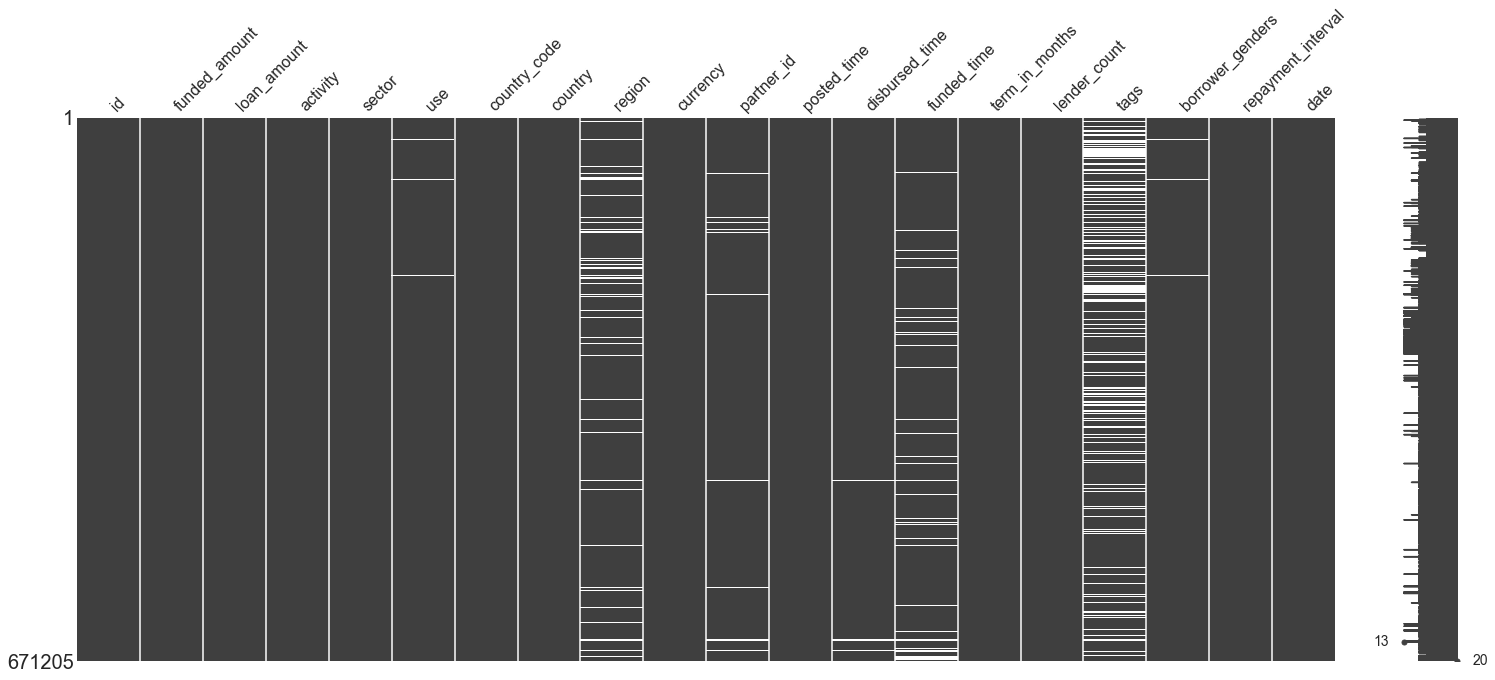

In [7]:
msno.matrix(df_kiva_loans)

Столбец тегов содержит много пропущенных значений. Также столбец с датой, когда запрашиваемая сумма была собрана на платформе kiva, имеет около 8% пропусков. Это может означать, либо то, что сумма пока не собрана, либо то, что она не была отражена в выгрузке корректно.

Следующим шагом приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них:

In [8]:
df_kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [9]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [10]:
df_kiva_loans.describe(include=[np.object])

<ipython-input-10-ae14ccb05771>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_kiva_loans.describe(include=[np.object])


,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


**Первые очевидные результаты и выводы, которые мы можем сделать:**
* В этом датасете содержатся данные о **87** странах почти на всех континентах, где люди запрашивали помощь на финансирование проектов.
* Страной с самым большим количеством займов являются **Филиппины**.
* Наиболее популярной категорией является **Сельское хозяйство**.
* Довольно широкий разброс значений по ряду числовых атрибутов, таких как, например, сумма займа, срок погашения кредита.
* В этом наборе данных **11298** разных значений пола! Очевидно, что это невозможно. Надо будет обязательно попытаться понять, почему у нас такой набор значений. Помним, что для качественной аналитики очень важно понимать анализируемый продукт. Поэтому ответ на этот вопрос очень важен
* Среднее финансирование в мире составляет **786** долларов, а медианное финансирование - **450** долларов. Возможно это означает, что есть небольшая доля заявок с крупными суммами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие суммы, а также то, насколько быстро деньги попали к заявителю после публикации заявки.
* Что еще более важно: есть только 1298 различных дат, в которые были опубликованы заявки на кредиты. Если мы подсчитаем соотношение, то это означает, что в Kiva ежедневно выдается более **500** займов. Это дает нам четкое представление о том, насколько важна эта краудсорсинговая платформа и какое влияние она оказывает.


## 2.2. Пользователи Kiva
***

В этой части мы сосредоточимся на основных демографических свойствах людей, которые мы можем получить из выгрузки: где они живут, какой у них пол, для каких нужд они запрашивают финансирование.

### 2.2.1. Из каких стран эти люди?
***


Чтобы получить наиболее (статистически) значимые результаты, оставим только те страны, которые составляют не менее 0,5% сообщества Kiva.

In [11]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [12]:
countries

Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: country, dtype: int64

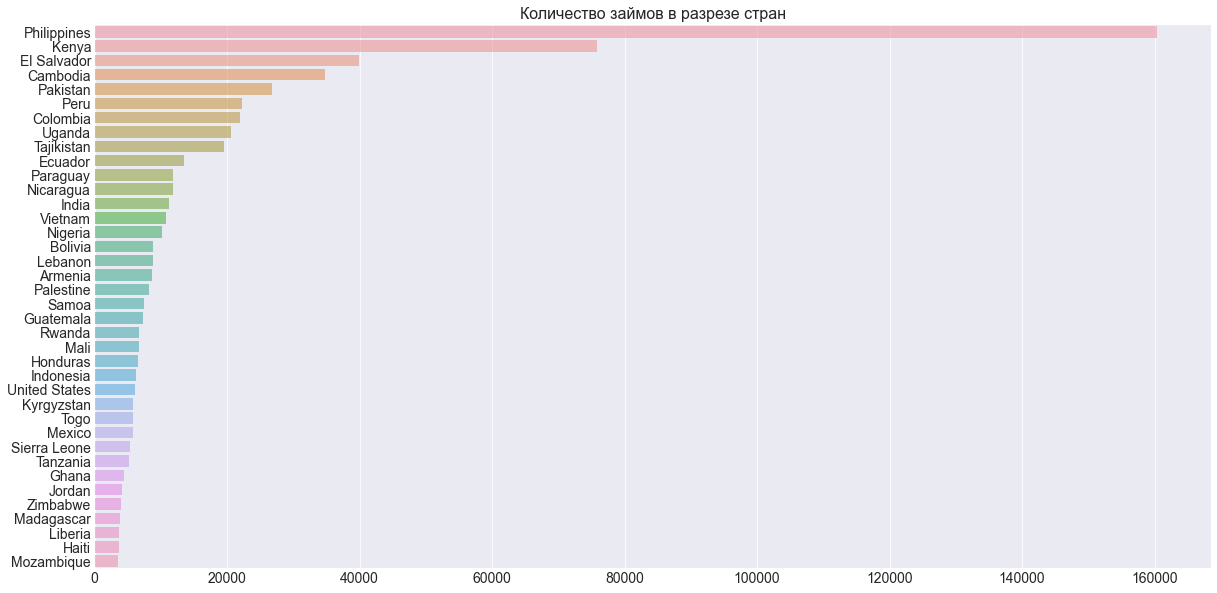

In [14]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

**Почему на Филиппинах наибольшее количество займов?**

Чуть менее четверти всех займов приходится на Филиппины

Возможно, потому что там широко распространены краткосрочные и небольшие займы.
Давайте запомним это предположение и внимательнее рассмотрим его позже. Такая стратегия может оказаться наиболее эффективной для точечного и обширного финансирования в условиях бедности и ограниченных возможностей локальных государств.

Мы также можем заметить, что в списке присутствует множество африканских стран, таких как Кения, Мали, Нигерия, Гана. Но вообще ни одной из стран Европейского Союза. Удивительным стало присутствие США в этом списке, поскольку уровень бедности в них не такой, как в других странах. 

Попробуем сгруппировать страны по частям света

Для этого воспользуемся файлом **kiva_mpi_region_locations**

In [15]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [16]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [17]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

In [18]:
regions = df_kiva_loans['world_region'].value_counts()

In [19]:
regions_list = regions.index.to_list()

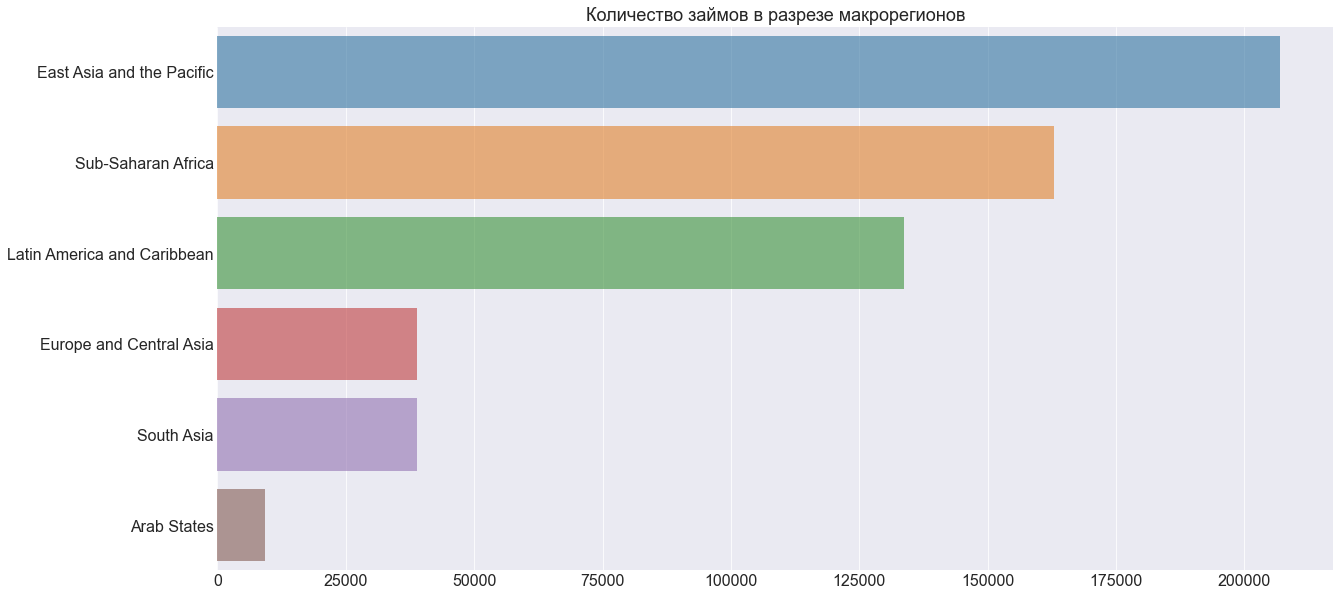

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.6)
plt.title("Количество займов в разрезе макрорегионов", fontsize=18)
plt.tick_params(labelsize=16)
plt.show();

Очевидным становится наличие 3-х лидеров и 3-х аутсайдеров по количеству выданных займов

Исходя из этого, можно предположить, что в 3 регионах-аутсайдерах либо нет острой потребности в присутствии Kiva (относительно богатые регионы), либо она пока не набрала те обороты, что мы видим в 3 регионах-лидерах. Присутствие региона "Арабские страны" свидетельствует в пользу первого предположения.

### 2.2.2. Люди какого пола обращаются за финансированием?
***

In [21]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                                                  426502
male                                                                                                                                                                                                                                                                    134710
female, female                                                                                                                                                                                                                                                           12164
female, female, female                                                                                                                                                                     

Во многих займах, заемщик на самом деле не один человек, а группа людей, у которых есть общий проект. В наборе данных они перечислены как «женщина, женщина, женщина» или «мужчина, женщина». Это объясняет 12к полов, которые мы обнаружили ранее: каждая такая комбинация считается отдельно.

Давайте использовать метку **group** для этих заемщиков на круговой диаграмме.

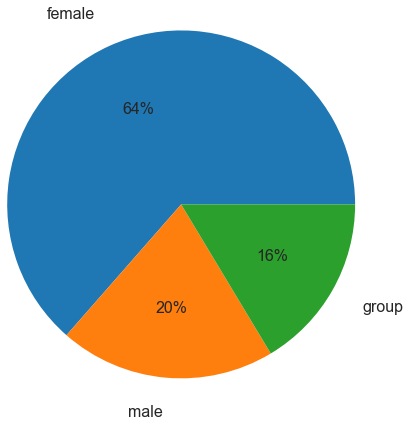

In [22]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]

borrowers = df_kiva_loans['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

Выясняется, что большинство заемщиков - женщины, и это весьма неожиданно. 

**Что это может означать?**

Например то, что женщины используют Kiva, чтобы получить финансирование и развивать собственные проекты в странах (большинство из которых являются странами третьего мира), где традиционно женщинам это было сделать крайне тяжело.

**В каких странах подавляющее большинство заемщиков - женщины?**

In [23]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]

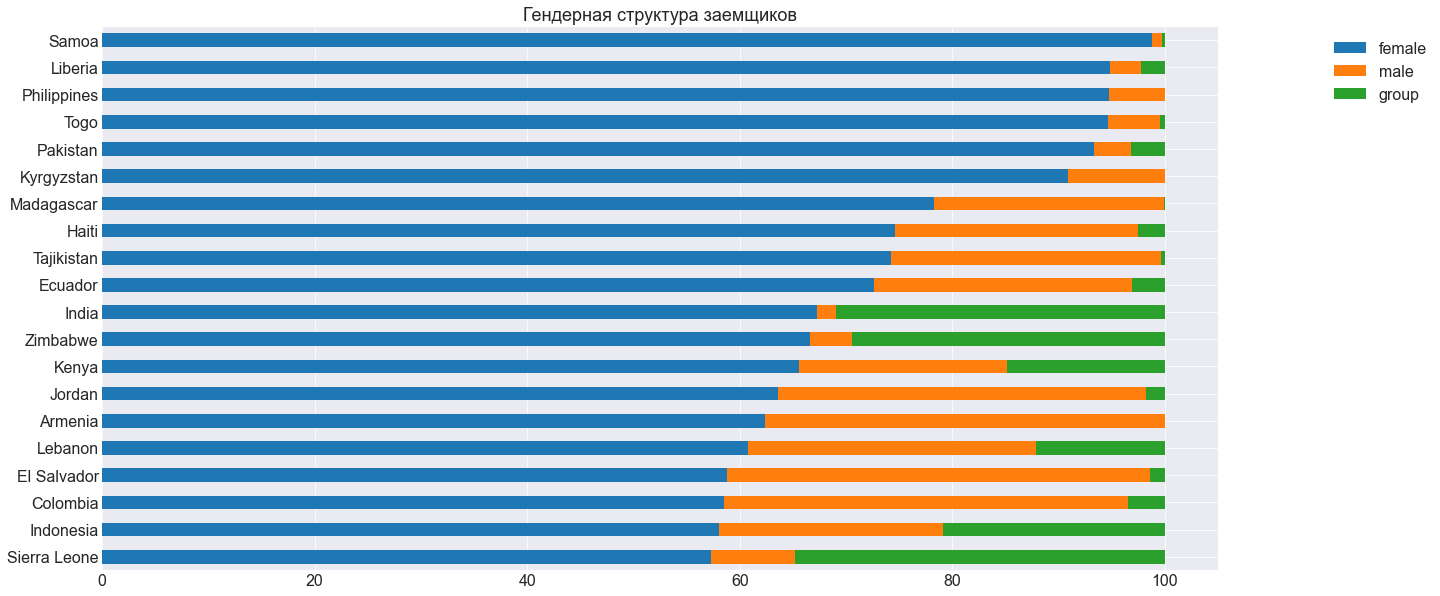

In [24]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**С чем может быть связана преобладающая доля женщин в структуре заемщиков в разрезе стрвн?**

Например, в связи с направлениями традиционно ассоциирующимися с женщинами: различного рода точки общественного питания и закусочные, магазины одежды и товаров для дома, бытовые услуги, выращивание сельскохозяйственных культур

Также можем отметить наличие в списке стран с преобладающей религией Ислам, в которых женщине пока, к сожалению, отводится второстепенная роль в принятии решений. 
Kiva позволяет получать бОльшие возможности и перспективы в тех регионах, где ранее это было вряд ли доступно.

`Вопрос для самостоятельной работы`

**А в каких странах преобладают мужчины? Группа людей?**

## 2.3. Количество займов
***

Теперь давайте посмотрим, для чего людям нужны кредиты и какие суммы они просят. 

### 2.3.1. В разрезе секторов
***

Начнем с секторов экономики. 
В сводке, которую мы видели выше, было 15 уникальных секторов. Рассмотрим, как обстоят дела в каждом из них.

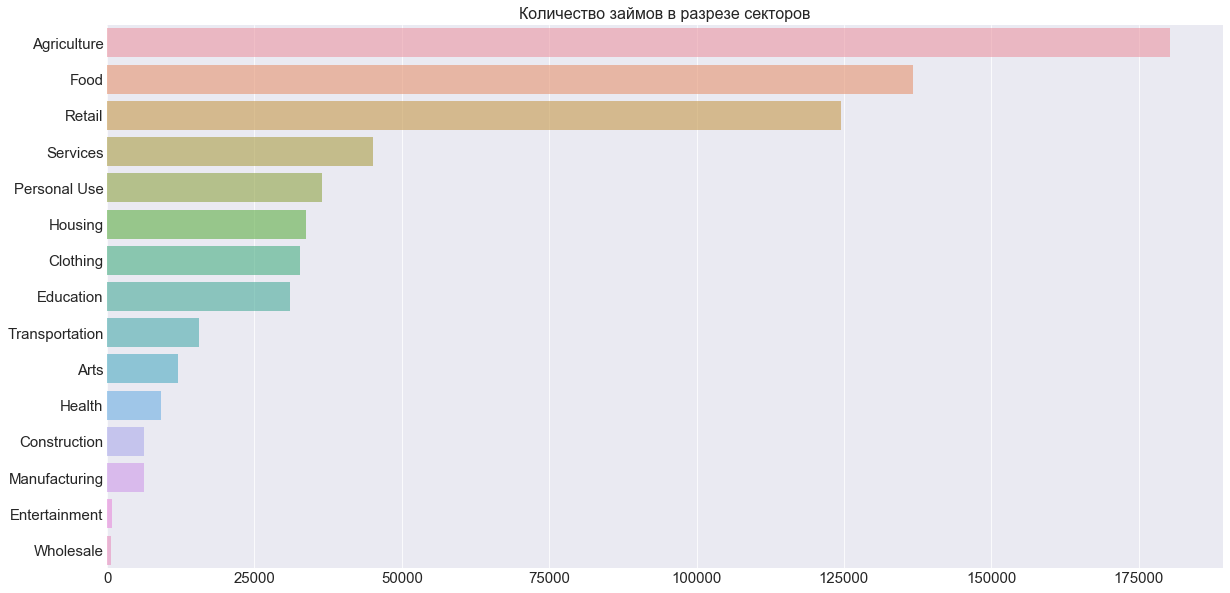

In [ ]:
sectors = df_kiva_loans['sector'].value_counts()

plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе секторов", fontsize=16)
# plt.xlabel('Number of loans', fontsize=16)
# plt.ylabel("Sectors", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

Самым доминирующим сектором является **сельское хозяйство**, за ним следует **пищевая промышленность** и **торговля**.
Это неудивительно, учитывая список стран, которые интенсивно используют Kiva. Например, беглый осмотр первых страниц сайта свидетельствует о таких примерах: покупка качественных семян и удобрений для использования на ферме и садоводческом хозяйстве, закупка свежей еды, злаков, рыбы, овощей для обеспечения работы предприятия общественного питания. Можно сделать ряд выводов о структуре экономик этих стран, свидетельствующих о том, что это сугубо развивающиеся страны, полагающиеся преимущественно на аграрную отрасль.

Важно отметить, что кредиты на **Личные нужды** также занимают значительную долю. Это означает, что есть люди, которые используют Kiva, потому что они крайне нуждаются.

Гораздо меньшие доли занимают **Строительство**, **Производство**, а также сфера **Развлечений** и **Оптовой торговли**

### 2.3.2. В разрезе видов деятельности
***

Давайте посмотрим более подробную версию и сделаем подсчет для **видов деятельности**:

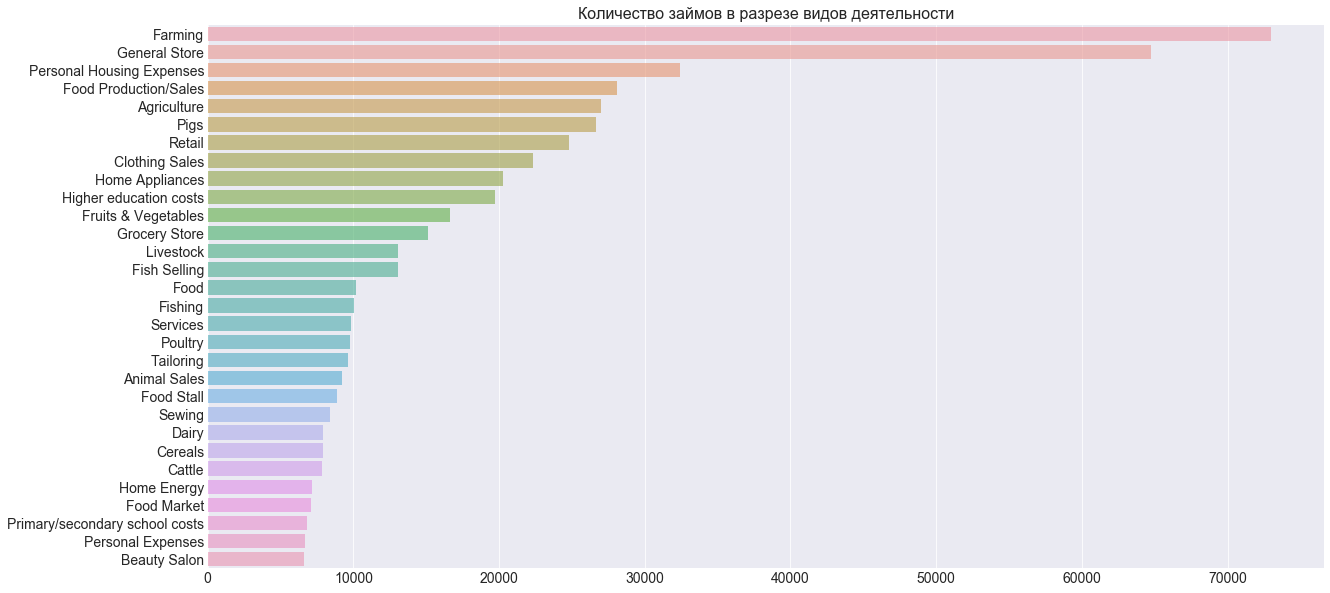

In [ ]:
activities = df_kiva_loans['activity'].value_counts().head(30)

plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе видов деятельности", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=activities.index, x=activities.values, alpha=0.6)
plt.show();

Детализация по видам деятельности подтверждает наши наблюдения. В лидерах __Фермерство__, **Розничные магазины**, **Домашнее хозяйство**, а также **Расходы на жилье**.

### 2.3.3. Рейтинг целевого назначения займа
***

In [ ]:
activities = df_kiva_loans['use'].value_counts().head(25)
activities.head(25)

to buy a water filter to provide safe drinking water for their family.                                                          5217
to buy a water filter to provide safe drinking water for her family.                                                            4082
To buy a water filter to provide safe drinking water for their family.                                                          2141
to build a sanitary toilet for her family.                                                                                      1708
to build a sanitary toilet for her family                                                                                       1599
to buy ingredients for her food production business                                                                             1419
to purchase more groceries to sell.                                                                                             1409
to buy feed and other supplies to raise her pigs.                    

Интересные выводы можно сделать из описания назначения каждого займа.

В лидерах по целевому назначению займов вещи, удовлетворяющие базовые человеческие потребности, такие как **Покупка фильтра для воды**, **Оборудование септика**, **Светильники на солнечных батареях**.

### 2.3.4. Наиболее популярные виды деятельности
***

Сейчас предлагаю наглядно сравнить наиболее популярные направления займов.
Для этого сгруппируем займы по признакам **sector, activity** и посмотрим на топ-10 в каждой группе.

In [ ]:
loans_by_activity_sector = \
    df_kiva_loans[df_kiva_loans['sector'].isin(sectors[:9].index.values)]\
    .groupby(['sector', 'activity'])['loan_amount']\
    .count()\
    .reset_index()

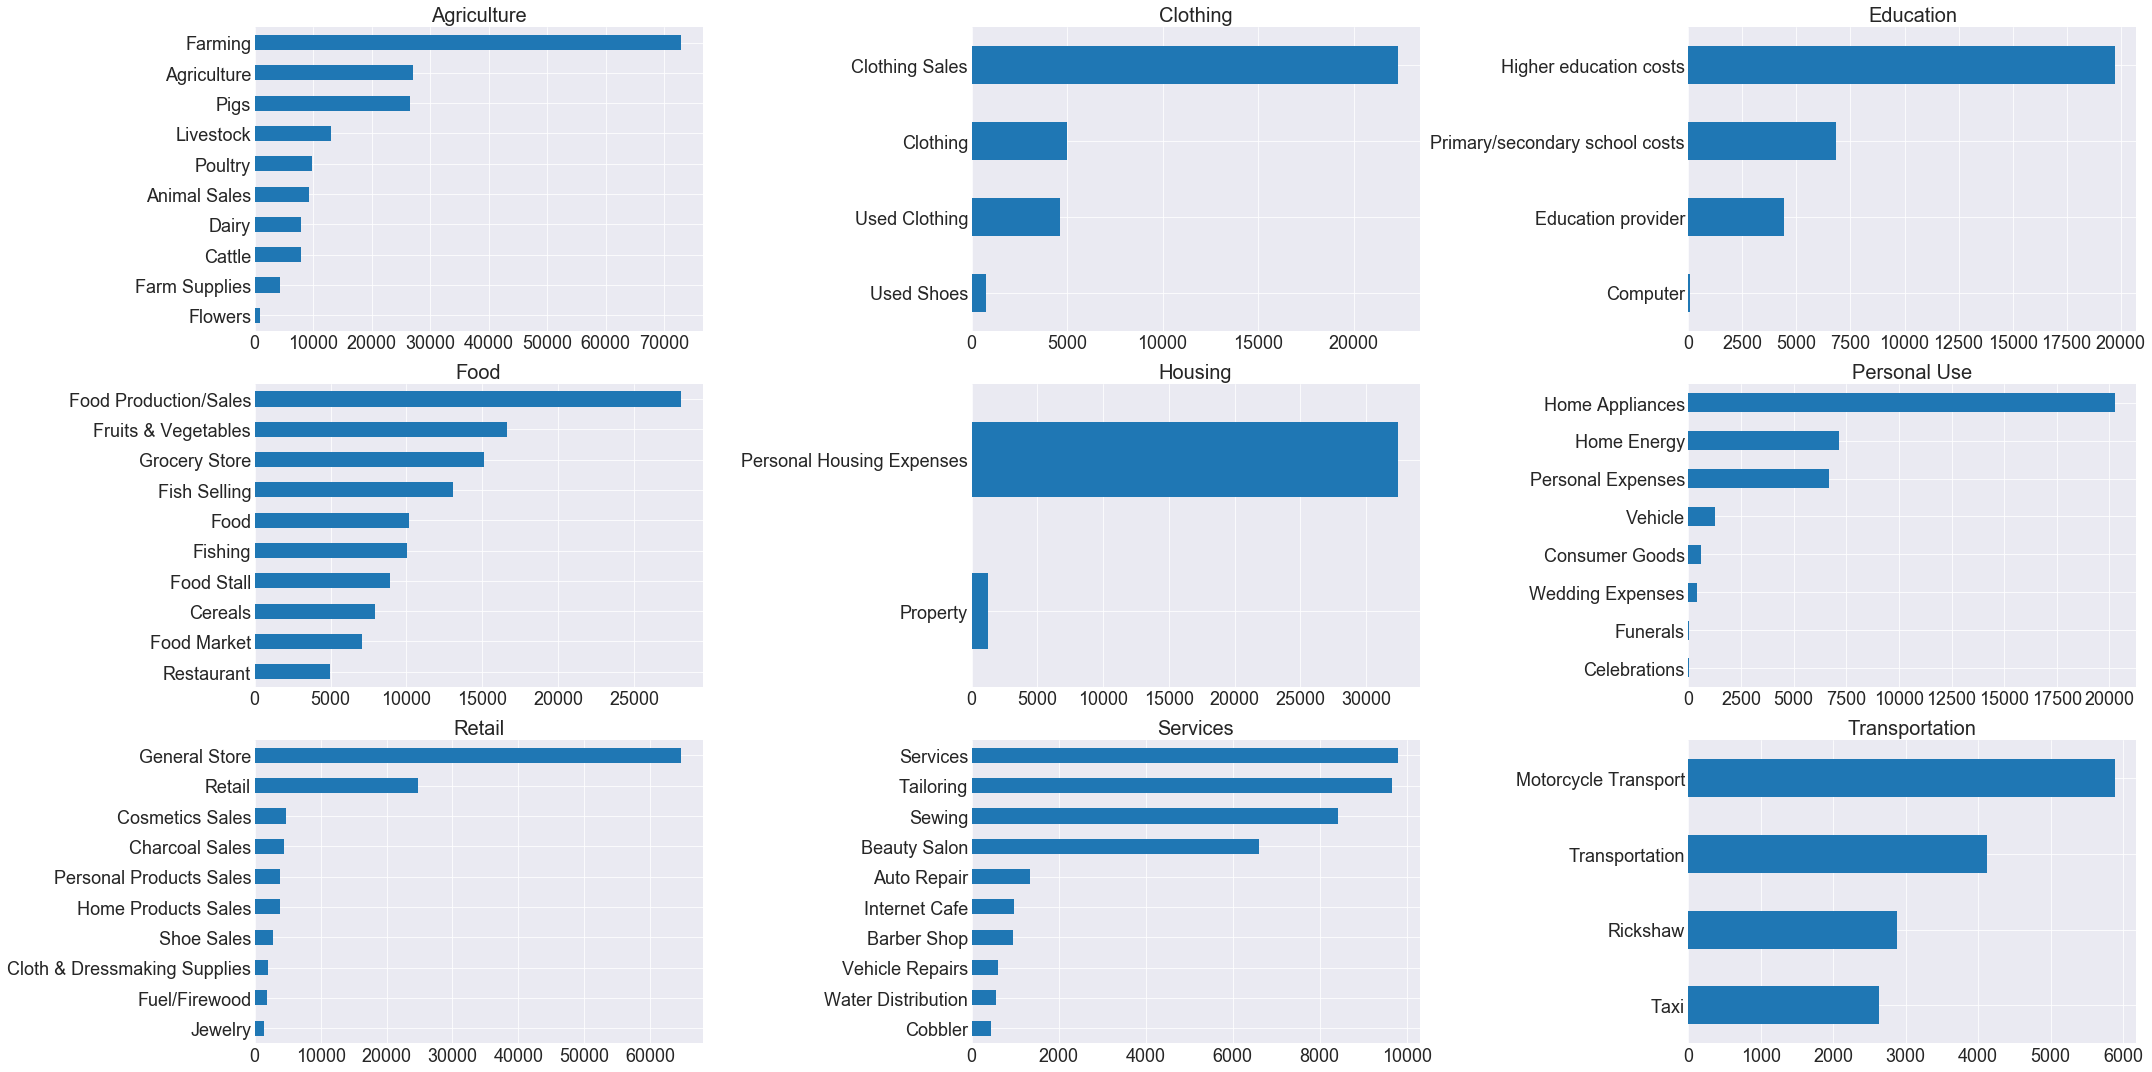

In [ ]:
fig,axes = plt.subplots(3,3, sharex=False, squeeze=False, figsize=(30,15))

for ax,q in zip(axes.ravel(), loans_by_activity_sector.sector.unique()):
    tmp_df = loans_by_activity_sector[loans_by_activity_sector.sector.eq(q)]\
                .dropna()\
                .sort_values(by='loan_amount')[-10:]
    ax.set_title(q, fontsize=20)  
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    
    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize=18)

Основной вывод, который мы можем сделать - львиная доля займов направлена на деятельность с невысокой добавленной стоимостью - Сельское Хозяйство, Розничная торговля, Сервис. То есть деятельность, в которой минимально задействованы смежные сектора экономики и невысок потенциал создания дополнительных рабочих мест и продуктов внутри страны, в отличие от, например, Производственных предприятий, Строительства, Ремесленных мастерских, Легкой промышленности.

И тем не менее, не может не радовать присутствие такого направления как, например, **Образование**: финансирование обучения школах и университетах, организация и подготовка курсов и образовательных программ.

## 2.4. Объем финансирования
***

### 2.4.1. Распределение суммы займа
***

Не менее важную информацию могут дать абсолютные значения займов, которые люди в разных странах запрашивают на реализацию своих целей.

Давайте посмотрим на график распределения сумм займов.

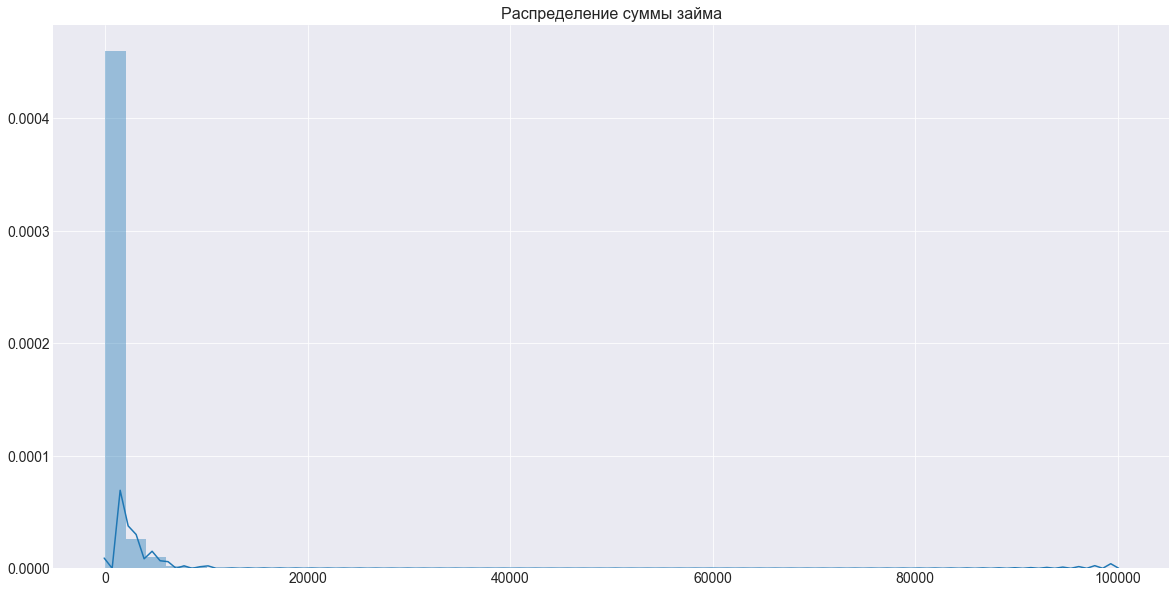

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)
plt.show()

Налицо наличие ряда предельных значений (выбросов). Они искажают распределение, и график не очень-то информативен в этой форме: нам нужно **усечь данные**, исключив выбросы из рассмотрения. Каким образом мы можем это сделать?

Предлагаю использовать основное, но очень мощное правило: правило 3-х сигм - **68–95–99.7**. Это правило гласит, что для нормального распределения:
* 68.27% значений $ \in [\mu - \sigma , \mu + \sigma]$
* 95.45% значений $ \in [\mu - 2\sigma , \mu + 2\sigma]$
* 99.7% значений $ \in [\mu - 3\sigma , \mu + 3\sigma]$  
где $\mu$ и $\sigma$ - среднее значение и стандартное отклонение нормального распределения.

Здесь верно, что распределение не обязательно нормальное, но для формы, подобной той, которая у нас есть, мы увидим, что применение третьего фильтра **значительно улучшит наши результаты**.

<img src="https://www.researchgate.net/profile/Bin_Wang111/publication/273955667/figure/fig3/AS:339883190177813@1458045875582/The-confidence-intervals-correspond-to-3-sigma-rule-of-the-normal-distribution.png" width="850" height="442" />



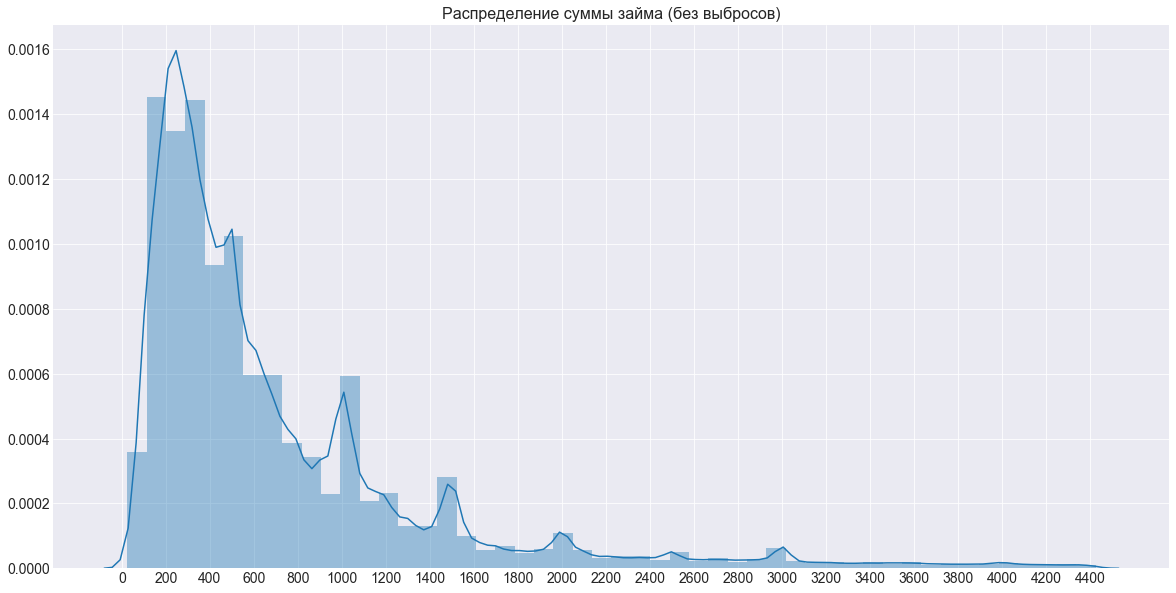

In [ ]:
# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
# Стандартное отклонение
std = df_kiva_loans['loan_amount'].std()
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['loan_amount']+1), 200))

sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
plt.show()

Теперь явно намного лучше!

* Большинство ссуд составляют от 100 до 600 долл. США с пиковыми значения в районе 200 и 400 долл. США.
* Сумма естественно уменьшается, но мы можем заметить наличие еще нескольких пиков в 1000 (наиболее четкий), 1500 и 2000 долл. США. Можно предположить, что есть определенный класс проектов, которые являются более «сложными» и финансируются бОльшими суммами.

### 2.4.2. Суммы займа в разрезе секторов
***

Как насчет больших подробностей? У нас есть информация о сумме кредита в целом, давайте теперь посмотрим разбиение по секторам:

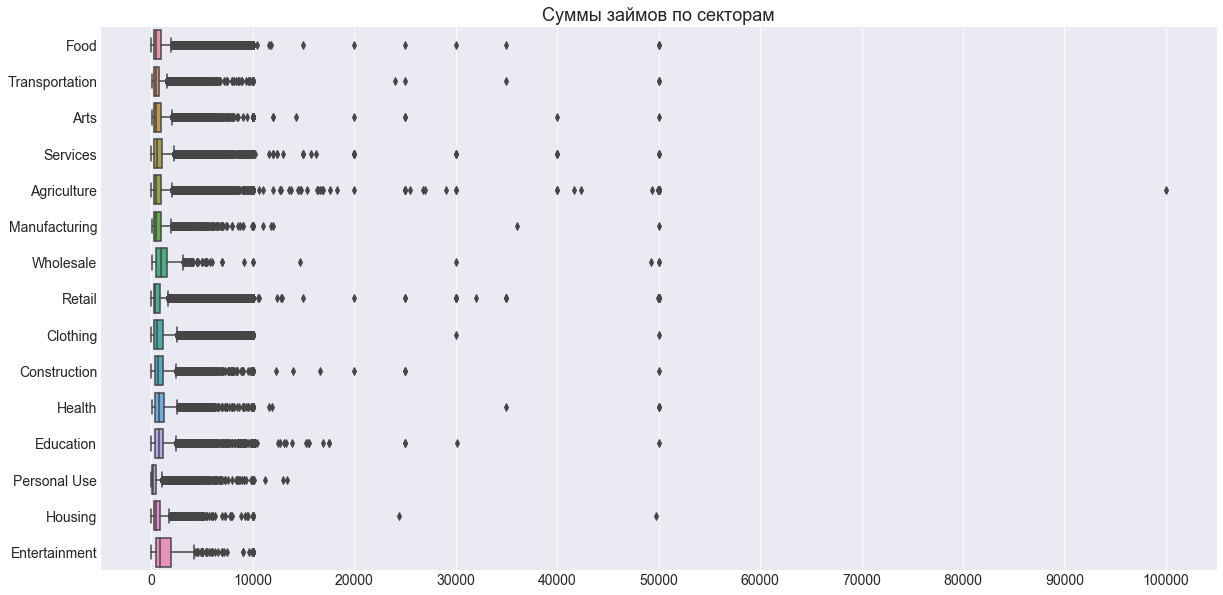

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 10000))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", data=df_kiva_loans).set(ylabel=None, xlabel=None)
plt.show()

Как видите, для любого сектора есть значения-выбросы. И почти для всех секторов, кроме **Личные нужды, Индустрия развлечений**, - наличие займов на суммы в районе $50.000.

Например, кажется, что кто-то запросил кредит на 100 000 для сельскохозяйственного проекта. Есть также много займов на суммы 20к, 50к.

`Вопрос для самостоятельной работы:`

**Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей?**

Давайте взглянем на средние и медианные значения суммы займа по секторам:

In [ ]:
sector_mean_median = df_kiva_loans\
    .groupby(['sector'])['loan_amount']\
    .agg(median='median', mean='mean')\
    .sort_values(by='median', ascending=False)

sort_order = sector_mean_median.index.to_list()

sector_mean_median

,median,mean
sector,,
Wholesale,950.0,1569.716088
Entertainment,887.5,1673.674699
Education,725.0,998.565924
Health,725.0,1067.266616
Construction,700.0,1068.147735
Clothing,600.0,1139.237829
Services,550.0,1064.631148
Agriculture,500.0,793.490228
Housing,500.0,701.549020


А также график, после того как мы избавимся от выбросов:

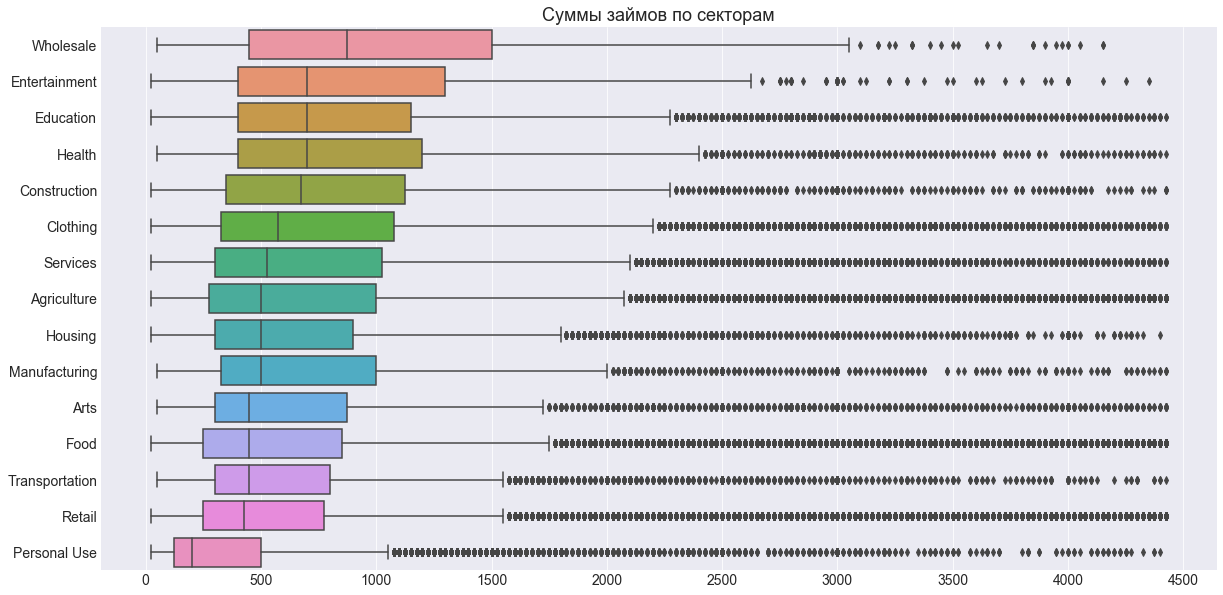

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", order=sort_order, data=df_kiva_loans_trimmed).set(ylabel=None, xlabel=None)
plt.show()

Прежде всего нужно отметить, что именно медиана дает робастную (устойчивую к выбросам) оценку центрального положения суммы займа.

Из графика становится ясно, что медиана суммы заявок на **Личные нужды** обладает наименьшим значением. Личные нужды включают предменты обихода и первой необходимости, обеспечение жилища энергией, теплом и водой. Именно эта группа заявок может свидетельствовать о случаях крайней нужды и бедности в различных странах.

На другой стороне графика сектора с самыми большими показателями медианы суммы займа: **Оптовая торговля**, требующая значительнх затрат на закупку, что вполне логично; **Образование** и **Здравоохранение**, а также **Сфера развлечений**.

### 2.4.3. Распределение по макрорегионам
***

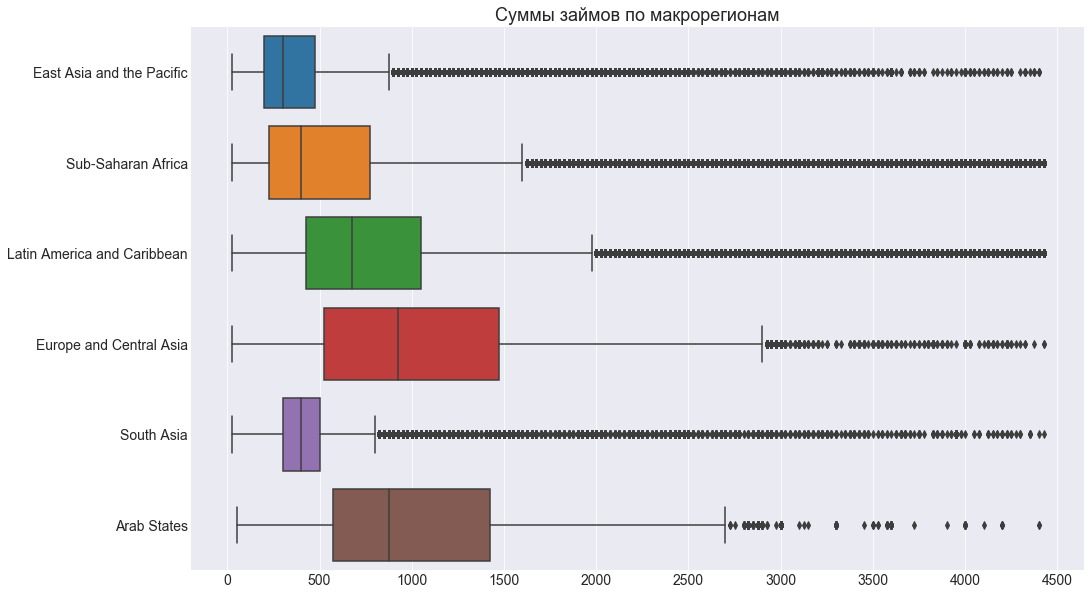

In [ ]:
plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions_list, data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)
# plt.legend(loc=1, bbox_to_anchor=(1.15, 1), fontsize=16)
plt.show()

Регионы расположены в порядке убывания количества займов (в соответствии с графиком, полученным в п. 2.2.1)

Скорее всего, те регионы, в которых медианные значения ниже, в целом беднее и требуют финансирования короткими, небольшими, но частыми займами. Эту ситуацию мы и наблюдаем в регионе **Юго-Восточная Азия**, лидерами в котором являются **Филиппины** и **Камбоджа**.

Однако на этом графике мы можем заметить регион, который выбивается из последовательности: **Южная Азия** и, в частности, такие страны как **Пакистан** и **Индия**. Вполне вероятно, что в этом регионе есть отличная площадка для расширения присутствия и поддержки со стороны сообщества Kiva.

`Вопрос для самостоятельной работы`

**Попробуйте найти связь между странами (макрорегионами), полом заемщика и суммой заявки. Какие выводы можно сделать из этих данных?**

## 2.5. Время ожидания средств
***

Итак, мы увидели, где Kiva наиболее популярна, типы деятельности и заемщиков, которые нуждаются в деньгах, а также сколько денег они обычно просят. Отлично!

Следующий интересный вопрос, который мы можем задать: как долго им действительно приходится ждать финансирования? К счастью, у нас есть две колонки, которые помогут нам в нашем исследовании:

* **posted_time**: соответствует дате + точный час, когда заявка появилась на сайте.
* **disbursed_time**: соответствует дате + точный час, когда деньги фактически были получены адресатом.

1. Отбрасываем строки с пропущенными значениями для «disbursed_time», получаем столбцы в правильном формате.
2. Вычисляем интервал между датами.
3. Исключим из рассмотрения заявки, для которых деньги сначала фактически выдаются агентами на местах и только потом публикуются на сайте.

In [ ]:
# drop na (missing) values
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

# dates columns:
dates = ['posted_time','disbursed_time']

# format dates:
df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x : x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

# calculate time interval
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1) 

# remove outliers +-3 sigma
dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()
# Keep rows where time_funding interval > 0 only
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]

### 2.5.1. Количество дней до полного финансирования заявки
***

Отлично! Мы получили расчетную величину.
Теперь построим график распределения количества дней дней до полного финансирования заявки:

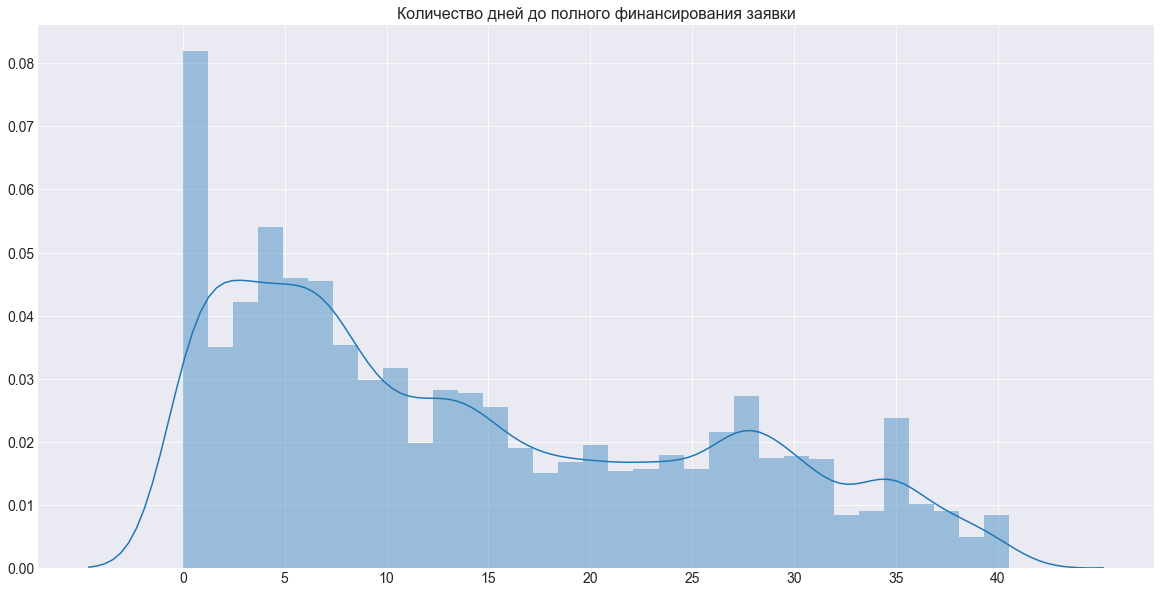

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Количество дней до полного финансирования заявки", fontsize=16)
plt.xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
plt.tick_params(labelsize=14)

sns.distplot(df_loans_dates_trimmed['time_funding']).set(ylabel=None, xlabel=None)
plt.show()

БОльшая часть заявок финансируется в течение 10 дней.

Однако также очевидно и наличие пиков в районе 27, 35 дней. Это уже может свидетельствовать о том, что часть заявок проходит довольно длительный процесс 
финансирования.

### 2.5.2. Время ожидания и суммы займов 
***

Для визуализации зависимости суммы займа и временного интервала финансирования давайте построим **тепловую карту**:

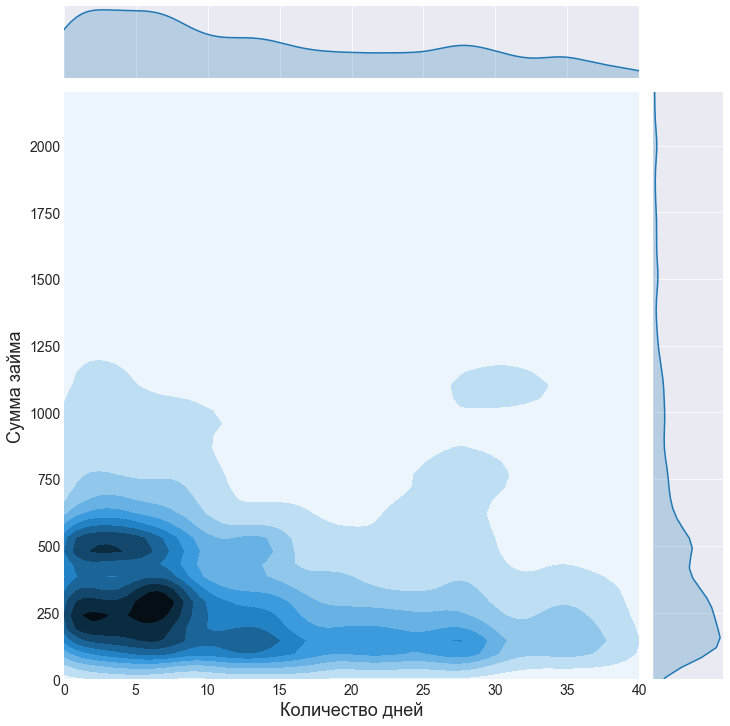

In [ ]:
p = sns.jointplot(x="time_funding", y="loan_amount", data=df_loans_dates_trimmed, kind='kde', height=10, ratio=7, xlim=[0,40] , ylim=[0,2200])\
        .set_axis_labels("Количество дней", "Сумма займа", size=18)

# p.ax_joint.set_xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
# p.ax_joint.set_yticks(np.arange(0, max(df_loans_dates_trimmed['loan_amount']+1), 250))
p.ax_joint.tick_params(labelsize=14)

plt.show()

На тепловой карте области, выделенные одним цветом, содержат одинаковое количестчо заявок. При этом области с более насыщенными, темными цветами содержат бОльшее количество заявок, чем более светлые области.

Действительно, возрастающее количество дней, требуемое для финансирования заявки можно объяснить возрастающей суммой, но только отчасти.

Мы также можем видеть наличие большого количества заявок на суммы до **$250** со сроками **20-35** дней.
Kiva явно может предпринять что-то, чтобы люди чаще обращали внимание на такие заявки.

### 2.5.3. Время ожидания и страны
***

Давайте попробуем проверить наличие смещения интервалов ожидания по странам, т.е. предположение о том, что заявки из ряда стран финансируются необоснованно долго, в силу тех или иных причин.

In [ ]:
df_country_median = df_loans_dates_trimmed.groupby(['world_region', 'country'])\
    .agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

df_country_median = df_country_median[df_country_median.country.isin(list_countries)].sort_values(by='time_funding')

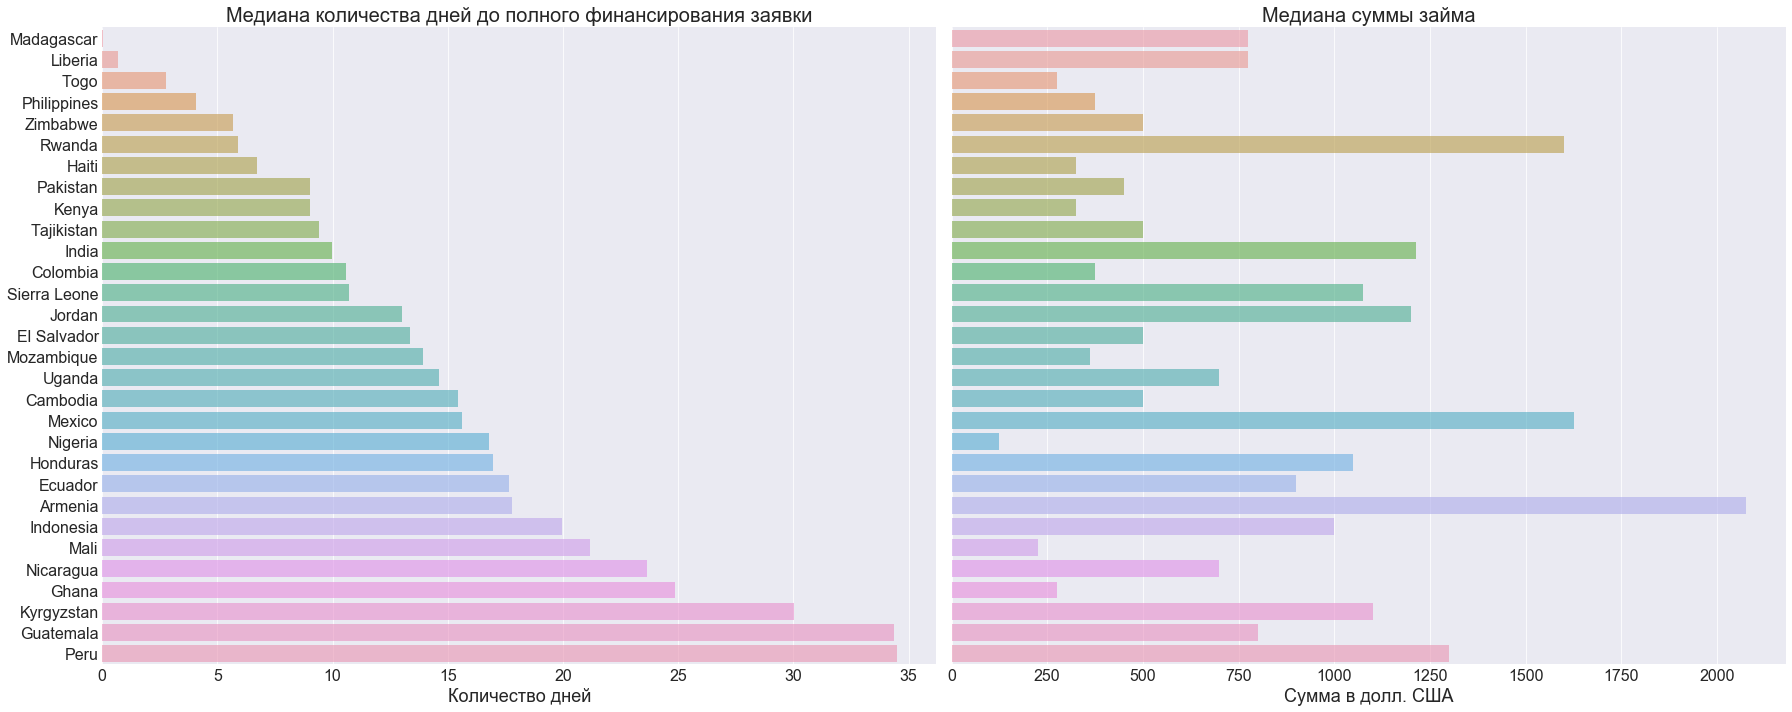

In [ ]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='time_funding', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана количества дней до полного финансирования заявки", fontsize=20)
ax[0].set_xlabel('Количество дней', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Действительно, прямой связи времени ожидания финансирования и суммой займа не наблюдается.

В ряде стран с довольно большой медианной суммой займа наблюдаются короткие интервалы на сбор средств:

- Либерия: **750** USD - **1** день
- Руанда: **1600** USD - **5** дней 
- Индия: **1250** USD - **10** дней

И наоборот, в нескольких странах на сбор относительно небольших сумм требуются длительные промежутки времени:

- Нигерия: **125** USD - **17** дней
- Мали: **250** USD - **22** дня
- Гана: **250** USD - **25** дней

Уверен, что в силах организаторов платформы Kiva и сообщества сглаживать такие явные неравенства

## 2.6. Сумма кредита и время погашения
***

У нас есть еще один интересный разрез датасета - это информация о количестве месяцев, необходимых заемщикам для погашения своих кредитов.

Простое построение среднего / медианного времени погашения по стране может дать некоторую информацию, однако она может ввести в заблуждение.

Действительно, скажем, в стране **А** кредиты погашаются в среднем через **12** месяцев, а в стране **В** - через 15 месяцев; Если на этом остановиться, то можно было бы просто сказать, что людям в стране **B** в среднем нужно больше времени, чтобы погасить свои кредиты, по сравнению с людьми в стране **A**. 

Теперь давайте предположим, что средняя сумма кредитов в стране **A** составляет **500** долларов, тогда как в стране **B** это **800** долларов, тогда это означает, что люди в стране **А** платят **41,66** в месяц, в то время как люди в стране **B** платят **51,33**  в месяц!

Поэтому, что более важно - это **соотношение суммы кредита и времени погашения**. Это соотношение дает представление о том, сколько денег в месяц человек в данной стране может позволить себе тратить на погашение кредитов.

Теперь рассчитаем сумму ежемесячного платежа в разрезе стран:

In [ ]:
df_country_median = df_country_median.sort_values(by='term_in_months')

In [ ]:
df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']

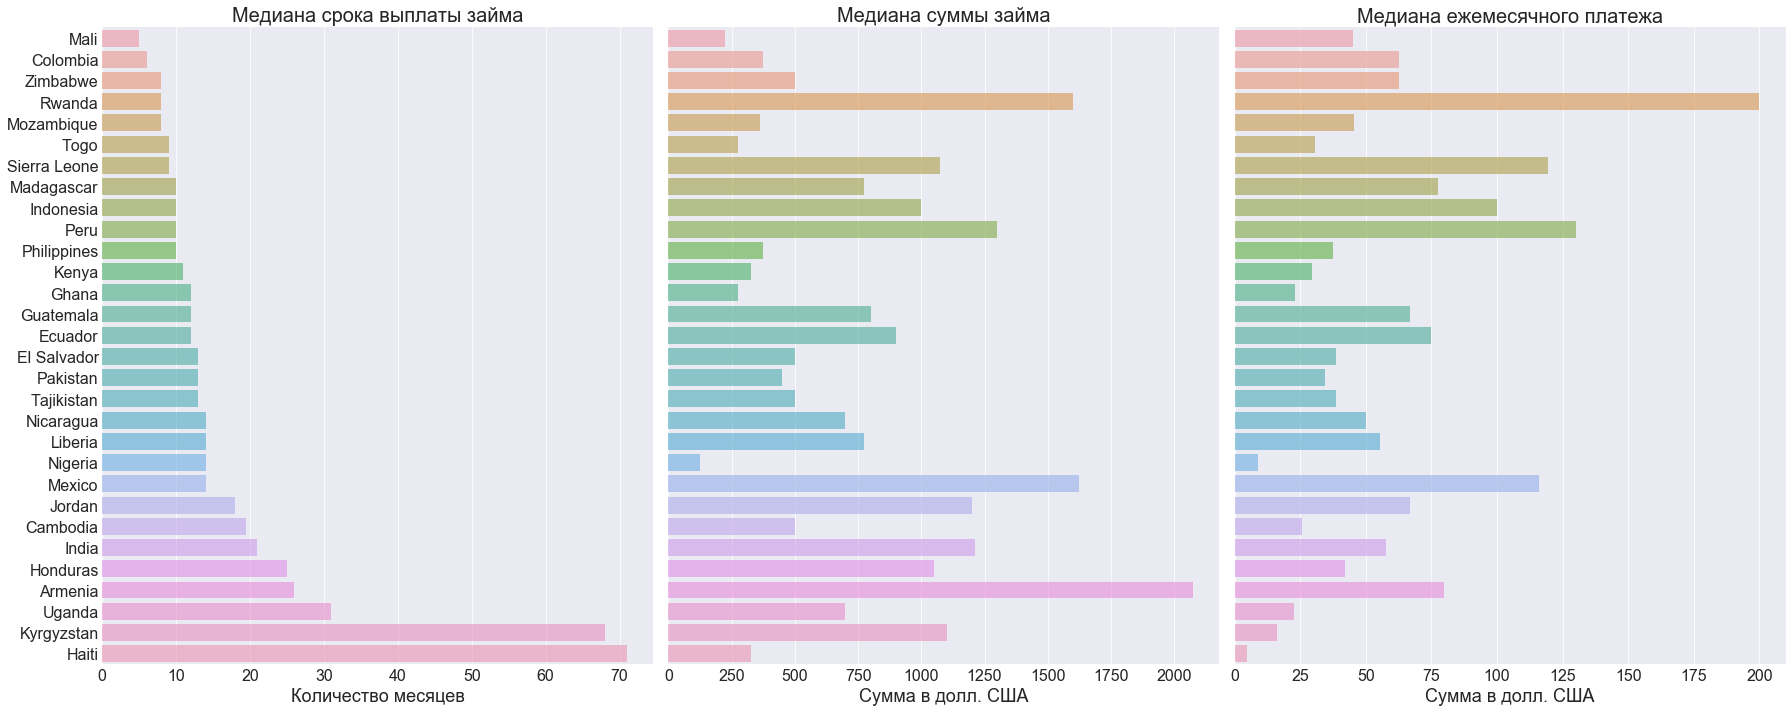

In [ ]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[2])
ax[2].set_title("Медиана ежемесячного платежа", fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Перед нами наглядное представление о рейтинге беднейших стран, люди из которых пользуются платформой Kiva. Это страны, в которых люди могут позволить себе выплачивать суммы значительно мЕньшие, чем в других странах, а значит и уровень бедности там выше.

- Гаити
- Нигерия
- Киргизия
- Уганда
- Гана

Как никогда стоит обратить внимание сообщества Kiva и направить усилия на поддержку самых нуждающихся!

# 3. Результаты и выводы
***

Пора подвести основные итоги и сделать выводы, которые могут быть полезны и интересны не только организаторам платформы Kiva, но и всему сообществу неравнодушных людей, которые стремятся сделать этот мир немного лучше:

- Прежде всего необходимо отметить очень важную и знаменательную роль площадки Kiva и ее сообщества. Для большого числа людей в совершенно разных частях нашей планеты Kiva играет важнейшую роль в части **поддержки операционной и хозяйственной деятельности**, активно дополняя, а часто выступаю в роли частного банковского сектора.
- В каждый момент времени стоит оказывать **адресную помощь** странам и регионам, которые больше всего **недофинансированы** относительно других. Это страны с высоким уровнем бедности, в которых люди могут позволить себе выплачивать суммы значительно мЕньшие, чем в других странах. Как никогда стоит обратить внимание сообщества Kiva и направить усилия на **поддержку самых нуждающихся**! Такие заявки могут быть отражены в отдельных категориях и включать призывы в свои заголовки: *Неотложные нужды, Срочно, Истекает срок финансирования*.
- Используя положительный опыт Филиппин, стоит стимулировать рост выдачи небольших по сумме и сроку погашения займов, которые обеспечат **бОльшую занятость** населения и рост **деловой активности**. По возможности, стоит делить заявки из небогатых стран на небольшие и короткие займы, каждый из которых будет очередным маленьким шагом в большом деле.
- Когда дело касается возможностей для развития человека - границы между мужчинами и женщинами стираются. Стоит стремиться к обеспечению доступа к финансированию для **женщин и мужчин в равной степени** и обратить внимание на те страны и регионы, где пока этот баланс нарушен. Например, для таких стран как Самоа, Либерия, Того, выводить на главную страницу сначала займы от мужчин. Отличным шагом станет публикация личных историй и примеров женщин и мужчин, например, в **интернет-издательствах**, **блоггинг платформах**, таких как medium.com, а также видеоблоге Kiva на youtube.com
- Приоритетными должны становиться заявки, направленные на развитие отраслей с **высокой добавленной стоимостью и стимулированием производств**, так как они являются движущей силой и по цепочке начинают задействовать другие отрасли. А именно Строительство, Производство, Легкая промышленность. Здесь очень кстати будет использование **умных рекомендательных систем** на сайте  Kiva.org, которые с бОльшей вероятностью будут подсказывать такие заявки.
- Всё ещё довольна высока доля заявок, направленных на удовлетворение самых **базовых человеческих потребностей**. Такие просьбы не должны оставаться незамеченными, но быть первыми кандидатами на главной странице. Недопустимы такие ситуации, когда, например, в Нигерии люди ждут жизненно важную чистую воду по 10 дней. Дайджест таких заявок можно включать в **регулярные почтовые рассылки** всем участникам сообщества Kiva, когда-либо принимавшим участие в финансировании проектов.
- Финансирование заявок на **крупные суммы** и **долгосрочные проекты** тоже работает. Для части стран возможность использовать Kiva будет играть решающую роль в формировании и реализации инфраструктурных и системообразующих проектов.
- Для ряда регионов и стран присутствия, таких как **Южная Азия** и, в частности, **Пакистан** и **Индия**, есть отличные перспективы для расширения присутствия и деятельности со стороны сообщества Kiva.
- Нередки случаи **проявления неравенства между странами**, таких как, например, длительные ожидания финансирования для части заявок с совсем небольшими суммами. Мы уверены, что в силах организаторов платформы Kiva и сообщества **сглаживать такие явные неравенства**, регулируя результаты поисковой выдачи, наполнение рассылок и рекомендуемых заявок для участников сообщества.